In [56]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [57]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

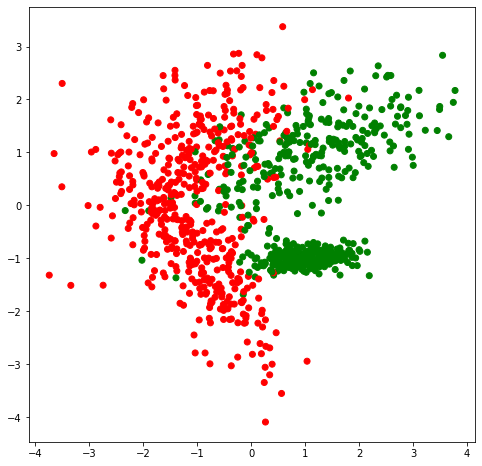

In [58]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=110)
# 

#classes = datasets.make_blobs(n_samples=1000,centers = 2, cluster_std = 1., random_state=12)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue','green'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.show()

In [59]:
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.9
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (900, 2)
Размер массива признаков тестовой выборки (100, 2)
Размер массива ответов для обучающей выборки (900,)
Размер массива ответов для тестовой выборки (100,)


In [60]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [61]:
def log_loss(w, X, y):
    m = X.shape[1]

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X))
    
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

In [73]:
def optimize(w, X, y, n_iterations, eta):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

### Задание_1

In [63]:
def predict(w, X, limit):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > limit): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= limit):
            y_predicted[:, i] = 0
    
    return y_predicted

### Задание_2

In [74]:
# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))-1

# n_iterations = 20
# eta = 0.55
limit = 0.5
for n_iterations in range(2, 102, 2):
    eta = 0.001
    while eta < 1:
        w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)
        print(f'iter: {n_iterations}, eta: {eta} - logloss: {losses}')
        eta *= 5
            


y_predicted_test = predict(w, X_test_tr, limit)
y_predicted_train = predict(w, X_train_tr, limit)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

iter: 2, eta: 0.001 - logloss: [1.5283152226818615, 1.527625043672172]
iter: 2, eta: 0.005 - logloss: [1.5283152226818615, 1.5248653849434883]
iter: 2, eta: 0.025 - logloss: [1.5283152226818615, 1.5110926322222955]
iter: 2, eta: 0.125 - logloss: [1.5283152226818615, 1.4428884146383996]
iter: 2, eta: 0.625 - logloss: [1.5283152226818615, 1.1213132779700008]
iter: 4, eta: 0.001 - logloss: [1.5283152226818615, 1.527625043672172, 1.5269350758792088, 1.526245319388735]
iter: 4, eta: 0.005 - logloss: [1.5283152226818615, 1.5248653849434883, 1.5214208360303425, 1.5179815866613544]
iter: 4, eta: 0.025 - logloss: [1.5283152226818615, 1.5110926322222955, 1.4940033165316573, 1.4770486139525192]
iter: 4, eta: 0.125 - logloss: [1.5283152226818615, 1.4428884146383996, 1.3609270075099393, 1.2825949495962525]
iter: 4, eta: 0.625 - logloss: [1.5283152226818615, 1.1213132779700008, 0.8173584806870724, 0.622237781159839]
iter: 6, eta: 0.001 - logloss: [1.5283152226818615, 1.527625043672172, 1.52693507587

iter: 44, eta: 0.025 - logloss: [1.5283152226818615, 1.5110926322222955, 1.4940033165316573, 1.4770486139525192, 1.460229853584153, 1.4435483541176186, 1.4270054226398734, 1.410602353407232, 1.3943404265885098, 1.3782209069781615, 1.3622450426797257, 1.3464140637598767, 1.330729180873382, 1.315191583859279, 1.2998024403085962, 1.2845628941039922, 1.269474063931717, 1.2545370417663952, 1.2397528913291995, 1.2251226465201224, 1.2106473098251733, 1.1963278506995105, 1.1821652039276995, 1.1681602679625136, 1.1543139032439305, 1.1406269305002588, 1.1271001290336102, 1.1137342349922636, 1.1005299396328039, 1.087487887575283, 1.074608675055042, 1.061892848175235, 1.0493409011645267, 1.0369532746448844, 1.0247303539148367, 1.0126724672540712, 1.0007798842557156, 0.989052814193166, 0.9774914044288229, 0.9660957388726192, 0.9548658364987171, 0.9438016499292498, 0.9329030640944459, 0.9221698949789124]
iter: 44, eta: 0.125 - logloss: [1.5283152226818615, 1.4428884146383996, 1.3609270075099393, 1.2

iter: 62, eta: 0.025 - logloss: [1.5283152226818615, 1.5110926322222955, 1.4940033165316573, 1.4770486139525192, 1.460229853584153, 1.4435483541176186, 1.4270054226398734, 1.410602353407232, 1.3943404265885098, 1.3782209069781615, 1.3622450426797257, 1.3464140637598767, 1.330729180873382, 1.315191583859279, 1.2998024403085962, 1.2845628941039922, 1.269474063931717, 1.2545370417663952, 1.2397528913291995, 1.2251226465201224, 1.2106473098251733, 1.1963278506995105, 1.1821652039276995, 1.1681602679625136, 1.1543139032439305, 1.1406269305002588, 1.1271001290336102, 1.1137342349922636, 1.1005299396328039, 1.087487887575283, 1.074608675055042, 1.061892848175235, 1.0493409011645267, 1.0369532746448844, 1.0247303539148367, 1.0126724672540712, 1.0007798842557156, 0.989052814193166, 0.9774914044288229, 0.9660957388726192, 0.9548658364987171, 0.9438016499292498, 0.9329030640944459, 0.9221698949789124, 0.9116018884642285, 0.9011987192783304, 0.8909599900624078, 0.8808852305661845, 0.87097389698249

iter: 78, eta: 0.001 - logloss: [1.5283152226818615, 1.527625043672172, 1.5269350758792088, 1.526245319388735, 1.5255557742864938, 1.5248664406582089, 1.5241773185895848, 1.5234884081663076, 1.5227997094740426, 1.5221112225984366, 1.5214229476251164, 1.5207348846396882, 1.5200470337277394, 1.5193593949748376, 1.5186719684665286, 1.5179847542883387, 1.5172977525257754, 1.5166109632643232, 1.5159243865894478, 1.5152380225865931, 1.5145518713411827, 1.5138659329386195, 1.513180207464285, 1.512494695003539, 1.5118093956417216, 1.5111243094641493, 1.5104394365561193, 1.5097547770029056, 1.5090703308897615, 1.5083860983019173, 1.5077020793245826, 1.507018274042944, 1.5063346825421664, 1.5056513049073919, 1.5049681412237412, 1.504285191576311, 1.5036024560501766, 1.5029199347303892, 1.5022376277019784, 1.5015555350499508, 1.5008736568592884, 1.5001919932149514, 1.4995105442018768, 1.4988293099049765, 1.4981482904091399, 1.4974674857992334, 1.4967868961600976, 1.4961065215765514, 1.49542636213

iter: 88, eta: 0.625 - logloss: [1.5283152226818615, 1.1213132779700008, 0.8173584806870724, 0.622237781159839, 0.5117597239291475, 0.4489482149979613, 0.41002906302284825, 0.38381071183784027, 0.3649933277410738, 0.3508404131249848, 0.3398137580866301, 0.3309857400240301, 0.32376425402191833, 0.3177534907254051, 0.312678600868263, 0.3083425732191197, 0.3046003522679995, 0.3013426627765552, 0.2984855431511138, 0.29596336525933914, 0.2937240546563578, 0.2917257403372463, 0.28993435732785355, 0.28832189907951133, 0.28686512219870186, 0.2855445719347724, 0.28434383896915316, 0.2832489855622911, 0.2822480974428029, 0.28133093025491374, 0.28048862795269247, 0.27971349653153993, 0.27899882074911364, 0.2783387145536155, 0.27772799816960114, 0.27716209643521966, 0.2766369542079794, 0.27614896557535934, 0.2756949143037553, 0.27527192349260016, 0.2748774128118383, 0.2745090620206181, 0.2741647797152973, 0.2738426764520786, 0.2735410415460161, 0.2732583229729743, 0.2729931099013175, 0.27274411746

iter: 100, eta: 0.125 - logloss: [1.5283152226818615, 1.4428884146383996, 1.3609270075099393, 1.2825949495962525, 1.2080448668416082, 1.137413435109752, 1.070816281570147, 1.0083424792762297, 0.95004879043522, 0.8959539619209717, 0.8460335753091588, 0.8002161762853166, 0.758381578741566, 0.7203622210982945, 0.6859481118570193, 0.6548952324015218, 0.6269364718853893, 0.6017935848299428, 0.5791885385232178, 0.5588529642777599, 0.5405350357399152, 0.5240037024504314, 0.509050630392529, 0.49549039859706656, 0.48315951911011, 0.47191476379089853, 0.46163116114504843, 0.4521999100927312, 0.44352636320802064, 0.43552816332578004, 0.42813357140300895, 0.4212799948410687, 0.4149127089553, 0.4089837557586774, 0.4034510006835114, 0.39827732724538667, 0.3934299506281739, 0.3888798329154184, 0.3846011847238809, 0.38057104003523223, 0.3767688929292498, 0.3731763866322497, 0.36977704678878937, 0.36655605214818787, 0.3635000369474532, 0.36059692019099887, 0.3578357577981888, 0.35520661423418676, 0.352

Минимальный logloss при 100 итераций и шаге обучения 0,625

In [75]:
# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))-1

n_iterations = 100
limit = 0.5
eta = 0.625
w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)           

y_predicted_test = predict(w, X_test_tr, limit)
y_predicted_train = predict(w, X_train_tr, limit)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[ 2.71933996]
 [-0.00678652]]
Точность на обучающей выборке: 89.111
Точность на тестовой выборке: 89.000


### Задание 3

In [76]:
accuracy_train = accuracy_score(y_train, y_predicted_train[0])
accuracy_test = accuracy_score(y_test, y_predicted_test[0])
print(f'Accuracy на трейне {accuracy_train}')
print(f'Accuracy на тесте {accuracy_test}')

Accuracy на трейне 0.8911111111111111
Accuracy на тесте 0.89


In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

print(confusion_matrix(y_test, y_predicted_test[0]))

[[47  8]
 [ 3 42]]


In [78]:
print(precision_score(y_test, y_predicted_test[0]))

0.84


In [79]:
print(recall_score(y_test, y_predicted_test[0]))

0.9333333333333333


In [80]:
print(f1_score(y_test, y_predicted_test[0]))

0.8842105263157894


### Задание 4

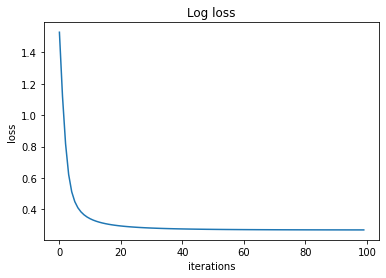

In [82]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

Так как мы стремимся к минимизации logloss, то начиная примерно с 20 итерации уменьшение функции логистических потерь минимально. Поэтому, исходя из графика, оптимальным является значение итераций равное 20. Возможно (предположение), что после 20 итерации мо